---

## Universidad de Costa Rica
### Escuela de Ingeniería Eléctrica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

---

* Estudiante: **Fabio Villalobos Pacheco**
* Carné: **B78346**
* Grupo: **2**

---
# `P4` - *Modulación digital IQ*

> La modulación digital es una de las aplicaciones del análisis de procesos estocásticos, y es parte de los sistemas digitales de comunicación. Este proyecto presenta una introdución a tópicos fundamentales de la ingeniería de comunicaciones para simular un sistema de transmisión de imágenes de baja resolución.

---
* Elaboración de nota teórica y demostración: **Jeaustin Sirias Chacón**, como parte de IE0499 - Proyecto Eléctrico: *Estudio y simulación de aplicaciones de la teoría de probabilidad en la ingeniería eléctrica*.
* Revisión y edición: **Fabián Abarca Calderón**

---
## 4. - Asignaciones del proyecto

### 4.1. - Modulación 16-QAM

* (50%) Realice una simulación del sistema de comunicaciones como en la sección 3.2., pero utilizando una modulación **16-QAM** en lugar de una modulación BPSK. Deben mostrarse las imágenes enviadas y recuperadas y las formas de onda.

#### 4.1.1 - Extracción de los pixeles de una imagen (fuente de información)

In [1]:
from PIL import Image
import numpy as np
from numpy import array

def fuente_info(imagen):
    '''Una función que simula una fuente de
    información al importar una imagen y
    retornar un vector de NumPy con las
    dimensiones de la imagen, incluidos los
    canales RGB: alto x largo x 3 canales

    :param imagen: Una imagen en formato JPG
    :return: un vector de pixeles
    '''
    img = Image.open(imagen)

    return np.array(img)


#### 4.1.2. - Codificación de pixeles a una base binaria (bits)

In [2]:

import numpy as np


def rgb_a_bit(imagen):
    '''Convierte los pixeles de base
    decimal (de 0 a 255) a binaria
    (de 00000000 a 11111111).

    :param imagen: array de una imagen
    :return: Un vector de (1 x k) bits 'int'
    '''
    # Obtener las dimensiones de la imagen
    x, y, z = imagen.shape

    # Número total de elementos (pixeles x canales)
    n_elementos = x * y * z

    # Convertir la imagen a un vector unidimensional de n_elementos
    pixeles = np.reshape(imagen, n_elementos)

    # Convertir los canales a base 2
    bits = [format(pixel, '08b') for pixel in pixeles]
    bits_Rx = np.array(list(''.join(bits)))

    return bits_Rx.astype(int)


#### 4.1.3. - Función de modulación en 16-QAM

In [3]:

# Se importa la librería NumPy.
import numpy as np
import scipy.interpolate
import scipy
import matplotlib.pyplot as plt


# Se define la función "modulador_I"
def modulador(bits, fc, mpp):
    simbolos = bits.reshape(-1, 4)

    # 1. Parámetros de la 'señal' de información (bits)
    N = len(bits)  # Cantidad de bits

    # 2. Construyendo un periodo de la señal portadora en fase "I".
    Tc = 1 / fc  # Tiempo de un periodo de la portadora I.
    t_periodo = np.linspace(0, Tc, mpp*2)
    portadora_I = np.cos(2 * np.pi * fc * t_periodo)
    portadora_Q = np.sin(2 * np.pi * fc * t_periodo)
    # 3. Inicializar la señal modulada s(t)
    t_simulacion = np.linspace(0, N * Tc, N * mpp)
    senal = np.zeros(t_simulacion.shape)
    moduladora_a = np.zeros(t_simulacion.shape)  # señal de informació
    moduladora_b = np.zeros(t_simulacion.shape)
    moduladora_c = np.zeros(t_simulacion.shape)  # señal de informació
    moduladora_d = np.zeros(t_simulacion.shape)
    

    # 4. Asignar las formas de onda según los bits 
    i = 0
    # Se utilizan 4 if para separar el bitstream en dos ondas portadoras
    for simbolo1, simbolo2,simbolo3,simbolo4 in simbolos:
        if simbolo1 == 0 and simbolo2 == 0:
            senal[i * mpp: (i + 2) * mpp] = portadora_I * -3
            moduladora_a[i * mpp: (i + 1) * mpp] = 0
            moduladora_b[i * mpp: (i + 1) * mpp] = 0
        if simbolo1  == 0 and simbolo2 == 1:
            senal[i * mpp: (i + 2) * mpp] = portadora_I * -1
            moduladora_a[i * mpp: (i + 1) * mpp] = 0
            moduladora_b[i * mpp: (i + 1) * mpp] = 1
        if simbolo1 == 1 and simbolo2 == 1:
            senal[i * mpp: (i + 2) * mpp] = portadora_I * 1
            moduladora_a[i * mpp: (i + 1) * mpp] = 1
            moduladora_b[i * mpp: (i + 1) * mpp] = 1
        if simbolo1  == 1 and simbolo2 == 0:
            senal[i * mpp: (i + 2) * mpp] = portadora_I * 3
            moduladora_a[i * mpp: (i + 1) * mpp] = 1
            moduladora_b[i * mpp: (i + 1) * mpp] = 0

        if simbolo3 == 0 and simbolo4 == 0:
            senal[(i+2) * mpp: (i + 4) * mpp] = portadora_Q * 3
            moduladora_c[i * mpp: (i + 1) * mpp] = 0
            moduladora_d[i * mpp: (i + 1) * mpp] = 0
        if simbolo3== 0 and simbolo4 == 1:
            senal[(i+2) * mpp: (i + 4) * mpp] = portadora_Q * 1
            moduladora_c[i * mpp: (i + 1) * mpp] = 0
            moduladora_d[i * mpp: (i + 1) * mpp] = 1
        if simbolo3== 1 and simbolo4 == 1:
            senal[(i+2) * mpp: (i + 4) * mpp] = portadora_Q * -1
            moduladora_c[i * mpp: (i + 1) * mpp] = 1
            moduladora_d[i * mpp: (i + 1) * mpp] = 1
        if simbolo3 == 1 and simbolo4 == 0:
            senal[(i+2) * mpp: (i + 4) * mpp] = portadora_Q * -3
            moduladora_c[i * mpp: (i + 1) * mpp] = 1
            moduladora_d[i * mpp: (i + 1) * mpp] = 0
        i=i+4
    
    moduladora = moduladora_a + moduladora_b + moduladora_c + moduladora_d
    Pm = (1 / (N * Tc)) * np.trapz(pow(senal, 2), t_simulacion)
    return senal,Pm, portadora_Q, portadora_I, moduladora





#### 4.1.4. - Construcción de un canal con ruido AWGN

In [4]:
# Se importa la librería NumPy.
import numpy as np


# Se define la función "canal_ruidoso"
def canal_ruidoso(senal_Tx, Pm, SNR):
    '''Un bloque que simula un medio de trans-
    misión no ideal (ruidoso) empleando ruido
    AWGN. Pide por parámetro un vector con la
    señal provieniente de un modulador y un
    valor en decibelios para la relación señal
    a ruido.

    :param senal_Tx: El vector del modulador
    :param Pm: Potencia de la señal modulada
    :param SNR: Relación señal-a-ruido en dB
    :return: La señal modulada al dejar el canal
    '''
    # Potencia del ruido generado por el canal
    Pn = Pm / pow(10, SNR / 10)

    # Generando ruido auditivo blanco gaussiano
    ruido = np.random.normal(0, np.sqrt(Pn), senal_Tx.shape)

    # Señal distorsionada por el canal ruidoso
    senal_Rx = senal_Tx + ruido

    return senal_Rx


#### 4.1.5. - Esquema de demodulación

In [5]:
# Se importa la librería NumPy.
import numpy as np


def demodulador(senal_Rx, portadora_Q, portadora_I, mpp):
    '''Un método que simula un bloque demodulador
    de señales, bajo un esquema BPSK. El criterio
    de demodulación se basa en decodificación por
    detección de energía.

    :param senal_Rx: La señal recibida del canal
    :param portadora: La onda portadora s(t)
    :param mpp: Número de muestras por periodo
    :return: Los bits de la señal demodulada
    '''
    # Cantidad de muestras en senal_Rx
    M = len(senal_Rx)

    # Cantidad de símbolos en transmisión
    N = int(M / mpp)

    # Vector para bits obtenidos por la demodulación
    bits_Rx = np.zeros(N)

    # Vector para la señal demodulada
    
    senal_demodulada = np.zeros(senal_Rx.shape)
    # Pseudo-energía de un período de la portadora
    Es_Q = np.sum(portadora_Q * portadora_Q)
    Es_I = np.sum(portadora_I * portadora_I)
    # Demodulación

    for i in range(0,N,4):
        # Producto interno de dos funciones
        producto_I = senal_Rx[i * mpp: (i + 2) * mpp] * portadora_I
        producto_Q = senal_Rx[(i+2) * mpp: (i + 4) * mpp] * portadora_Q
        Ep_I = np.sum(producto_I)
        Ep_Q = np.sum(producto_Q)
        senal_demodulada[i*mpp:(i+2)*mpp]=producto_I
        senal_demodulada[(i + 2) * mpp:(i + 4) * mpp]=producto_Q
        
        # Criterio de decisión por detección de energía

        if (Ep_I > 2 * Es_I):
            bits_Rx[i] = 1
            bits_Rx[i+1] = 0
        if (Ep_I > 0 * Es_I and Ep_I < 2 * Es_I):
            bits_Rx[i] = 1
            bits_Rx[i+1] = 1
        if (Ep_I < 0 * Es_I and Ep_I > -2* Es_I):
            bits_Rx[i] = 0
            bits_Rx[i+1] = 1
        if (Ep_I < -2 * Es_I):
            bits_Rx[i] = 0
            bits_Rx[i+1] = 0

        if (Ep_Q < -2 * Es_Q):
            bits_Rx[i+2] = 1
            bits_Rx[i+3] = 0
        if (Ep_Q < 0 * Es_Q and Ep_Q > -2 * Es_Q):
            bits_Rx[i+2] = 1
            bits_Rx[i+3] = 1
        if (Ep_Q > 0 * Es_Q and Ep_Q < 2 * Es_Q):
            bits_Rx[i+2] = 0
            bits_Rx[i+3] = 1
        if (Ep_Q > 2 * Es_Q):
            bits_Rx[i+2] = 0
            bits_Rx[i+3] = 0

    #bits = matriz.reshape(-1)
    #senal_demodulada = senal_demoduladasin + senal_demoduladacos

    return bits_Rx.astype(int), senal_demodulada



#### 4.1.6. - Reconstrucción de la imagen

In [6]:
import numpy as np


def bits_a_rgb(bits_Rx, dimensiones):
    '''Un blque que decodifica el los bits
    recuperados en el proceso de demodulación

    :param: Un vector de bits 1 x k
    :param dimensiones: Tupla con dimensiones de la img.
    :return: Un array con los pixeles reconstruidos
    '''
    # Cantidad de bits
    N = len(bits_Rx)
    dimensiones = dimensiones
    # Se reconstruyen los canales RGB
    bits = np.split(bits_Rx, N / 8)

    # Se decofican los canales:
    canales = [int(''.join(map(str, canal)), 2) for canal in bits]
    pixeles = np.reshape(canales, dimensiones)

    return pixeles.astype(np.uint8)


### 4.1.7. - Simulación del sistema de comunicaciones con modulación 16-QAM

Duración de la simulación:  5.585258722305298
0 errores, para un BER de 0.0000.


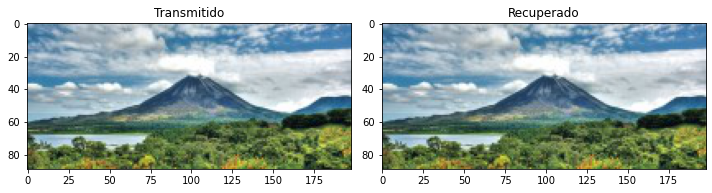

In [7]:
# Se importa la librería NumPy.
import numpy as np

# Se importa la biblioteca "matplotlib" junto con la función "pyplot".
import matplotlib.pyplot as plt
import time

# Parámetros
fc = 5000  # frecuencia de ambas portadoras
mpp = 20  # muestras por periodo de la portadora
SNR = 3005  # relación señal-a-ruido del canal

# Iniciar medición del tiempo de simulación
inicio = time.time()

# 1. Importar y convertir la imagen a trasmitir
imagen_Tx = fuente_info('arenal.jpg')
dimensiones = imagen_Tx.shape

# 2. Codificar los pixeles de la imagen
bits_Tx = rgb_a_bit(imagen_Tx)

senal_Tx,Pm, portadora_Q, portadora_I, moduladora= modulador(bits_Tx, fc, mpp)

# 3. Se transmite la señal modulada, por un canal ruidoso
senal_Rx = canal_ruidoso(senal_Tx, Pm, SNR)

# 4. Se desmodula la señal recibida del canal
bits_Rx, senal_demodulada = demodulador(senal_Rx, portadora_Q, portadora_I, mpp)

# 5. Se visualiza la imagen recibida
imagen_Rx = bits_a_rgb(bits_Rx, dimensiones)
Fig = plt.figure(figsize=(10, 6))

# Cálculo del tiempo de simulación
print('Duración de la simulación: ', time.time() - inicio)

# 6. Calcular número de errores
errores = sum(abs(bits_Tx - bits_Rx))
BER = errores / len(bits_Tx)
print('{} errores, para un BER de {:0.4f}.'.format(errores, BER))

# Mostrar imagen transmitida
ax = Fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(imagen_Tx)
ax.set_title('Transmitido')

# Mostrar imagen recuperada
ax = Fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(imagen_Rx)
ax.set_title('Recuperado')
Fig.tight_layout()

plt.imshow(imagen_Rx)

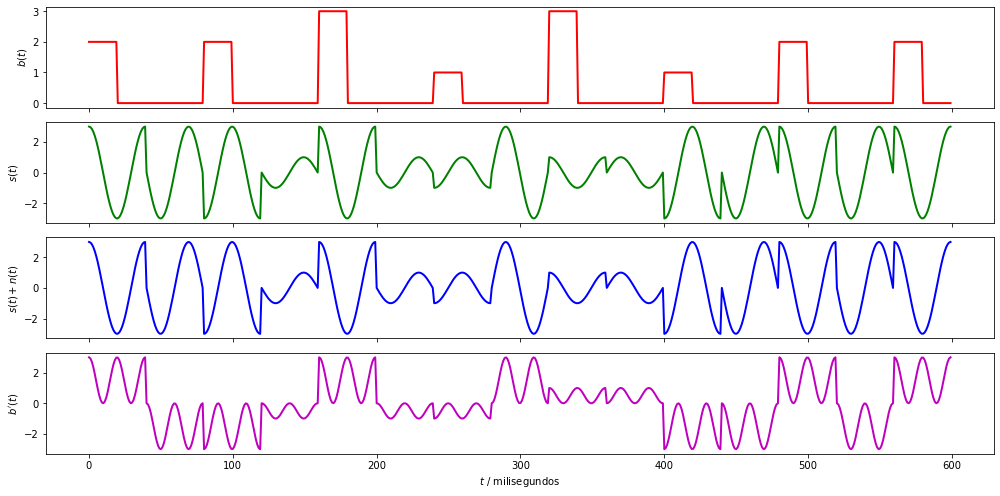

In [8]:
# Visualizar el cambio entre las señales
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(14, 7))

# La onda cuadrada moduladora (bits de entrada)
ax1.plot(moduladora[0:600], color='r', lw=2)
ax1.set_ylabel('$b(t)$')

# La señal modulada por BPSK
ax2.plot(senal_Tx[0:600], color='g', lw=2)
ax2.set_ylabel('$s(t)$')

# La señal modulada al dejar el canal
ax3.plot(senal_Rx[0:600], color='b', lw=2)
ax3.set_ylabel('$s(t) + n(t)$')

# La señal demodulada
ax4.plot(senal_demodulada[0:600], color='m', lw=2)
ax4.set_ylabel('$b^{\prime}(t)$')
ax4.set_xlabel('$t$ / milisegundos')
fig.tight_layout()
plt.show()




### 4.2. - Estacionaridad y ergodicidad

* (30%) Realice pruebas de estacionaridad y ergodicidad a la señal modulada `senal_Tx` y obtenga conclusiones sobre estas.

C:\Users\fabio\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


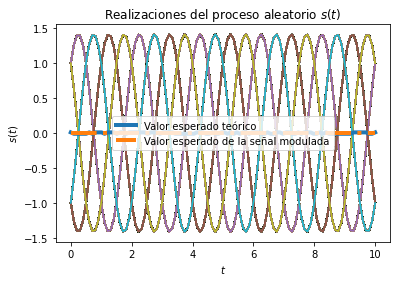

KeyboardInterrupt: 

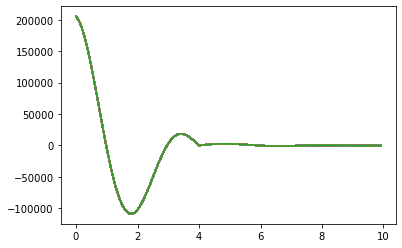

In [9]:
# Se importa la librería NumPy.
import numpy as np

# Se importa el módulo stats de SciPy.
from scipy import stats

# Se importa la biblioteca "matplotlib" junto con la función "pyplot".
import matplotlib.pyplot as plt

# Parámetros
fc = 5000  # frecuencia de ambas portadoras
p = 1/2


# Variables aleatorias A1 y A2.
va_A1 = stats.bernoulli(p)
va_A2 = stats.bernoulli(p) 

# Creación del vector de tiempo
T = 100         # número de elementos
t_final = 10    # tiempo en segundos
t = np.linspace(0, t_final, T)

# N realizaciones
N = 10000

# Funciones del tiempo S(t) con N realizaciones
S_t = np.empty((N, len(t))) 

# Creación de las muestras del proceso s(t)
for i in range(N):
    A1 = va_A1.rvs()
    A2 = va_A2.rvs()
    
    if A1==0:
        A1=-1
    else:
        A1=1
    
    if A2==0:
        A2=-1
    else:
        A2=1
        
    s_t = A1 * np.cos(2*np.pi*fc*t) + A2 * np.sin(2*np.pi*fc*t)
    S_t[i,:] = s_t
        
    plt.plot(t, s_t)
    
# Promedio de s(t).
P = [np.mean(S_t[i,:]) for i in range(len(t))]
plt.plot(t, P, lw=4, label='Valor esperado teórico')
    
# Promedio se la senal_Tx.
P = [np.mean(senal_Tx) for i in range(len(t))]
plt.plot(t, P, '-.', lw=4, label='Valor esperado de la señal modulada')
    
# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $s(t)$')
plt.xlabel('$t$')
plt.ylabel('$s(t)$')
plt.legend() # Se imprime las leyendas de la gráfica.
plt.show()   # Muestra la gráfica.

'''
Cáculo de la autocorrelación 
'''

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
    for i, tau in enumerate(desplazamiento):
        corr[n, i] = np.correlate(senal_Tx, np.roll(senal_Tx, tau))/T
    plt.plot(taus, corr[n,:])

### 4.3. - Densidad espectral de potencia

* (20%) Determine y grafique la densidad espectral de potencia para la señal modulada `senal_Tx`.

\begin{equation}
\displaystyle
\mathcal{S}_{XX}(\omega) = \lim_{T \rightarrow \infty}\frac{E[\vert X_{T}(\omega) \vert^2]}{2T}
\end{equation}

In [10]:
# Se importa la función fft de SciPy.
from scipy import fft

# Transformada de Fourier 
senal_f = fft(senal_Tx) # La función fft realiza el cálculo de la transformada rápida de Fourier de la senal_Tx. 

# Muestras de la señal
Nm = len(senal_Tx)

# Número de símbolos
Ns = Nm // mpp

# Tiempo del símbolo
Ts = 1 / fc

# Tiempo entre muestras (período de muestreo)
Tm = Ts / mpp

# Tiempo de la simulación
T = Ns * Ts

# Espacio de frecuencias
f = np.linspace(0.0, 1.0/(2.0*Tm), Nm//2)

# Se define la densidad espectral de potencia Sxx = |s(w)|^2
S_xx = np.power(np.abs(senal_f), 2)

# Se imprime la densidad espectral de potencia para la señal modulada.
print('----------\nDensidad espectral de potencia para la señal modulada\n----------')
print(S_xx)
print('----------\n')

# Se grafica la densidad espectral de potencia para la señal modulada con respecto a la frecuencia. 
plt.plot(f, 2.0/Nm * np.power(np.abs(senal_f[0:Nm//2]), 2), color = 'darkmagenta' , label='$S_{XX}(f)$')
plt.xlim(0, 20000)
plt.title('Densidad espectral de potencia para $s(t)$')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.legend() # Se imprime la leyenda de la gráfica.
plt.grid()   
plt.show()   # Muestra la gráfica.

TypeError: 'module' object is not callable